In [70]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [21]:
plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 200)

In [26]:
with open('sp500.txt', 'r') as f:
    sp500 = f.readlines()
sp500[:12]

['1\n',
 'Apple Inc.\n',
 'AAPL\n',
 'IT\n',
 '3.911126\n',
 '2\n',
 'Microsoft Corporation\n',
 'MSFT\n',
 'IT\n',
 '3.082336\n',
 '3\n',
 'Amazon.com Inc.\n']

In [42]:
sp500_df=pd.DataFrame([{'ind': sp500[5 * i].rstrip(), 'company': sp500[5 * i + 1].rstrip(),
               'ticket': sp500[5 * i + 2].rstrip(), 'sector': sp500[5 * i + 3].rstrip(),
               'weight': float(sp500[5 * i + 4].rstrip())} for i in range(int(len(sp500) // 5))]).set_index('ind')
sp500_df.head(20)

,company,ticket,sector,weight
ind,,,,
1,Apple Inc.,AAPL,IT,3.911126
2,Microsoft Corporation,MSFT,IT,3.082336
3,Amazon.com Inc.,AMZN,Интернет,2.688036
4,Facebook Inc. Class A,FB,Интернет,1.835431
5,JPMorgan Chase & Co.,JPM,Банки,1.707639
6,Berkshire Hathaway Inc. Class B,BRK.B,Финансы,1.703224
7,Johnson & Johnson,JNJ,Здоровье,1.527487
8,Alphabet Inc. Class C,GOOG,Интернет,1.454123
9,Alphabet Inc. Class A,GOOGL,Интернет,1.437765


In [43]:
assets = sp500_df[sp500_df['weight'] > 1]['ticket'].to_list()
assets

['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'JPM',
 'BRK.B',
 'JNJ',
 'GOOG',
 'GOOGL',
 'XOM',
 'BAC',
 'WFC',
 'INTC']

In [44]:
weigths = np.array([1 / len(assets)] * len(assets))
weigths

array([0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308])

In [60]:
stock_start_date = '2013-01-01'
datetime.now() - timedelta(1)
yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')
yesterday

'2021-02-02'

In [61]:
df = pd.DataFrame()

for stock in tqdm.tqdm(assets):
    try:
        df[stock] = web.DataReader(stock, 'yahoo', start=stock_start_date, end=today)['Adj Close']
    except KeyError:
        continue

100%|██████████| 13/13 [00:20<00:00,  1.61s/it]


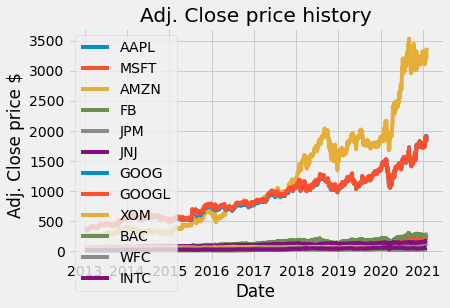

In [63]:
# visualize prices
for c in df.columns.values:
    plt.plot(df[c], label=c)
    
plt.title('Adj. Close price history')
plt.xlabel('Date')
plt.ylabel('Adj. Close price $')
plt.legend(df.columns.values, loc='upper left')
plt.show()

## Analysis

### daily simple return

In [64]:
returns = df.pct_change()
returns

,AAPL,MSFT,AMZN,FB,JPM,JNJ,GOOG,GOOGL,XOM,BAC,WFC,INTC
Date,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.013396,0.004547,-0.008214,-0.002016,-0.001412,0.000581,0.000581,-0.001803,-0.005819,-0.008274,-0.002806
2013-01-04,-0.027855,-0.018715,0.002592,0.035650,0.017725,0.011450,0.019760,0.019760,0.004630,0.012542,0.005178,-0.007505
2013-01-07,-0.005882,-0.001870,0.035925,0.022949,0.001102,-0.002096,-0.004363,-0.004363,-0.011578,-0.001651,-0.004866,0.004254
2013-01-08,0.002691,-0.005246,-0.007748,-0.012237,0.001982,0.000140,-0.001974,-0.001973,0.006255,-0.009099,-0.001726,-0.007529
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,-0.007684,0.002453,-0.028126,-0.035136,-0.028272,-0.015251,-0.045091,-0.046652,-0.011336,-0.035876,-0.038560,-0.029342
2021-01-28,-0.034985,0.025891,0.001559,-0.026237,0.017597,0.007624,0.017654,0.018835,0.015656,0.016426,0.021213,0.046277
2021-01-29,-0.037421,-0.029172,-0.009705,-0.025170,-0.011068,-0.035647,-0.014690,-0.013943,-0.026487,-0.022098,-0.030185,-0.009988


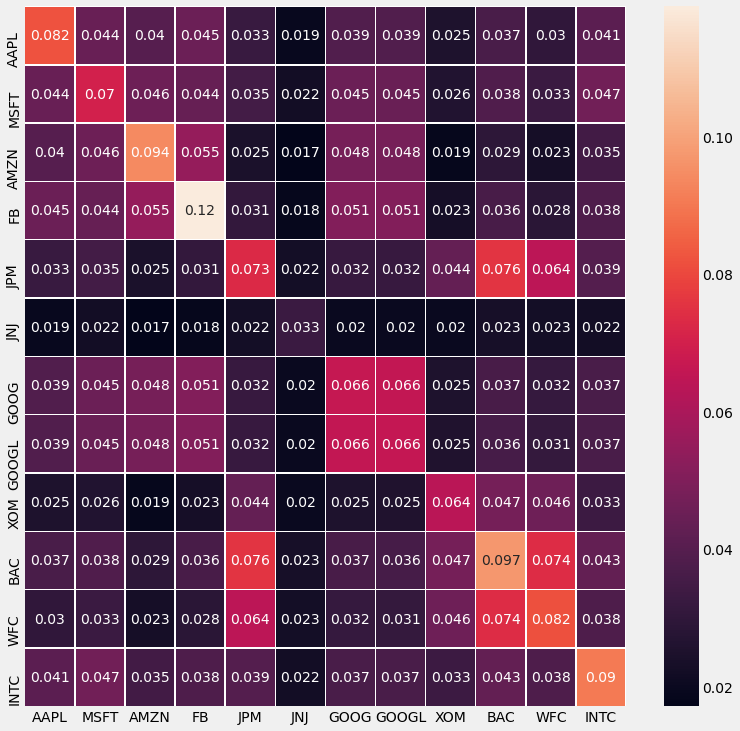

In [75]:
plt.figure(figsize=(12,12))
n_traiding_days = 252
cov_matrix = returns.cov() * n_traiding_days
sns.heatmap(cov_matrix, annot=True, linewidths=.5);

#### Calculate portfolio variance

In [77]:
# for 1 company got exception while loading data
portf_var = np.dot(weigths[:-1].T, np.dot(cov_matrix, weigths[:-1]))
portf_var

0.03386494561625123

#### Calculate portfolio std

In [79]:
portf_std = np.sqrt(portf_var)
portf_std

0.18402430713427842

#### Calculate anual portfolio return

In [81]:
portf_simp_annual_return = np.sum(weigths[:-1] * returns.mean()) * 252
portf_simp_annual_return

0.19816020182235972

### Show expected anual return, std(volatility/risk), variance

In [83]:
print(f'Expected annual return -> {round(portf_simp_annual_return, 2) * 100} %')
print(f'Annual volatility -> {round(portf_std, 2) * 100} %')
print(f'Annual variance -> {round(portf_var, 2) * 100} %')

Expected annual return ->: 20.0 %
Annual volatility ->: 18.0 %
Annual variance ->: 3.0 %


## Optimize portfolio

In [85]:
!pip install pyportfolioopt

     |████████████████████████████████| 53 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 835 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 88 kB/s eta 0:00:011
     |████████████████████████████████| 3.5 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.6 MB/s eta 0:00:011
Using legacy 'setup.py install' for ecos, since package 'wheel' is not installed.
Using legacy 'setup.py install' for scs, since package 'wheel' is not installed.
    Running setup.py install for scs ... done
    Running setup.py install for ecos ... done


In [87]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

In [89]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.13182), ('MSFT', 0.40393), ('AMZN', 0.34939), ('FB', 0.06794), ('JPM', 0.0), ('JNJ', 0.04692), ('GOOG', 0.0), ('GOOGL', 0.0), ('XOM', 0.0), ('BAC', 0.0), ('WFC', 0.0), ('INTC', 0.0)])
Expected annual return: 33.4%
Annual volatility: 23.2%
Sharpe Ratio: 1.35


(0.3335351383829033, 0.2322859836512924, 1.3497807033143336)

### Calculate amount of stocks

In [92]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15700)

allocation, leftover = da.lp_portfolio()
print(f'Discrete allocation -> {allocation}')
print(f'Funds remaining -> {leftover:.2f} $')

Discrete allocation -> {'AAPL': 15, 'MSFT': 25, 'AMZN': 2, 'FB': 1, 'JNJ': 4}
Funds remaining -> 15.32 $
